In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [42]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [4]:
train_1=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt",sep="\s+",header=None)
train_2=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt",sep="\s+",header=None)

In [5]:
column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", 
              "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", 
              "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13",
              "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]

In [6]:
train_1.columns=column_names
train_2.columns=column_names

In [7]:
display(train_1.head())

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [8]:
display(train_2.head())

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [9]:
train_1.shape,train_2.shape

((53759, 26), (61249, 26))

In [10]:
display(train_1.describe().T)
display(train_2.describe().T)

,count,mean,std,min,25%,50%,75%,max
engine,53759.0,131.082981,74.463862,1.0000,68.0000,131.0000,195.0000,260.0000
cycle,53759.0,109.154746,69.180569,1.0000,52.0000,104.0000,157.0000,378.0000
setting1,53759.0,23.998407,14.747376,0.0000,10.0046,25.0013,41.9980,42.0080
setting2,53759.0,0.572056,0.310016,0.0000,0.2507,0.7000,0.8400,0.8420
setting3,53759.0,94.046020,14.237735,60.0000,100.0000,100.0000,100.0000,100.0000
sensor1,53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
sensor2,53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
sensor3,53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
sensor4,53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
sensor5,53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200


,count,mean,std,min,25%,50%,75%,max
engine,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
cycle,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
setting1,61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
setting2,61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
setting3,61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
sensor1,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
sensor2,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
sensor3,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
sensor4,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
sensor5,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200


In [11]:
display(train_1.info())
display(train_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   engine    53759 non-null  int64  
 1   cycle     53759 non-null  int64  
 2   setting1  53759 non-null  float64
 3   setting2  53759 non-null  float64
 4   setting3  53759 non-null  float64
 5   sensor1   53759 non-null  float64
 6   sensor2   53759 non-null  float64
 7   sensor3   53759 non-null  float64
 8   sensor4   53759 non-null  float64
 9   sensor5   53759 non-null  float64
 10  sensor6   53759 non-null  float64
 11  sensor7   53759 non-null  float64
 12  sensor8   53759 non-null  float64
 13  sensor9   53759 non-null  float64
 14  sensor10  53759 non-null  float64
 15  sensor11  53759 non-null  float64
 16  sensor12  53759 non-null  float64
 17  sensor13  53759 non-null  float64
 18  sensor14  53759 non-null  float64
 19  sensor15  53759 non-null  float64
 20  sensor16  53759 non-null  fl

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   engine    61249 non-null  int64  
 1   cycle     61249 non-null  int64  
 2   setting1  61249 non-null  float64
 3   setting2  61249 non-null  float64
 4   setting3  61249 non-null  float64
 5   sensor1   61249 non-null  float64
 6   sensor2   61249 non-null  float64
 7   sensor3   61249 non-null  float64
 8   sensor4   61249 non-null  float64
 9   sensor5   61249 non-null  float64
 10  sensor6   61249 non-null  float64
 11  sensor7   61249 non-null  float64
 12  sensor8   61249 non-null  float64
 13  sensor9   61249 non-null  float64
 14  sensor10  61249 non-null  float64
 15  sensor11  61249 non-null  float64
 16  sensor12  61249 non-null  float64
 17  sensor13  61249 non-null  float64
 18  sensor14  61249 non-null  float64
 19  sensor15  61249 non-null  float64
 20  sensor16  61249 non-null  fl

None

In [12]:
print(train_1.isnull().sum())
print(train_2.isnull().sum())

engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64
engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64


In [13]:
print((train_1.duplicated()==1).sum())
print((train_2.duplicated()==1).sum())

0
0


In [14]:
display(train_1.head())
display(train_2.head())

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


#### Features
"engine" : Engine No.

"cycle" : Time, In Cycles #### 2. Setting Names:

"setting1" : Operation Setting 1

"setting2" : Operation Setting 2

"setting3" : Operation Setting 3 #### 3. Sensor Names:

"sensor1" : Fan Inlet Temperature (◦R)

"sensor2" : LPC Outlet Temperature (◦R)

"sensor3" : HPC Outlet Temperature (◦R)

"sensor4" : LPT Outlet Temperature (◦R)

"sensor5" : Fan Inlet Pressure (psia)

"sensor6" : Bypass-Duct Pressure (psia)

"sensor7" : HPC Outlet Pressure (psia)

"sensor8" : Physical Fan Speed (rpm)

"sensor9" : Physical Core Speed (rpm)

"sensor10" : Engine Pressure Ratio(P50/P2)

"sensor11" : HPC Outlet Static Pressure (psia)

"sensor12" : Ratio of Fuel Flow to Ps30 (pps/psia)

"sensor13" : Corrected Fan Speed (rpm)

"sensor14" : Corrected Core Speed (rpm)

"sensor15" : Bypass Ratio

"sensor16" : Burner Fuel-Air Ratio

"sensor17" : Bleed Enthalpy

"sensor18" : Required Fan Speed

"sensor19" : Required Fan Conversion Speed

"sensor20" : High-Pressure Turbines Cool Air Flow

"sensor21" : Low-Pressure Turbines Cool Air Flow

In [15]:
display(train_1.nunique())
print("\n")
display(train_2.nunique())

engine        260
cycle         378
setting1      536
setting2      105
setting3        2
sensor1         6
sensor2      1590
sensor3     12305
sensor4     15411
sensor5         6
sensor6        14
sensor7      2067
sensor8       897
sensor9     22434
sensor10        9
sensor11      681
sensor12     1672
sensor13      514
sensor14    14905
sensor15     8464
sensor16        2
sensor17       53
sensor18        6
sensor19        2
sensor20      510
sensor21    17837
dtype: int64

engine        249
cycle         543
setting1      536
setting2      105
setting3        2
sensor1         6
sensor2      1704
sensor3     13558
sensor4     17353
sensor5         6
sensor6        46
sensor7      5926
sensor8      1038
sensor9     25297
sensor10       21
sensor11      737
sensor12     5627
sensor13      483
sensor14    15938
sensor15    11915
sensor16        2
sensor17       54
sensor18        6
sensor19        2
sensor20      652
sensor21    21574
dtype: int64

In [16]:
display(train_1[["engine","cycle"]].groupby("cycle").max())
display(train_2[["engine","cycle"]].groupby("cycle").max())

,engine
cycle,
1,260
2,260
3,260
4,260
5,260
...,...
374,112
375,112
376,112


,engine
cycle,
1,249
2,249
3,249
4,249
5,249
...,...
539,118
540,118
541,118


In [17]:
print(train_1["cycle"].max())
print(print(train_2["cycle"].max()))

378
543
None


In [18]:
import plotly.express as px

In [19]:
fig = px.bar(x=train_1["engine"], y=train_1["cycle"])
fig.show()

In [20]:
fig = px.bar(x=train_2["engine"], y=train_2["cycle"])
fig.show()

In [21]:
df1=train_1.groupby('engine')[['cycle']].max()
df1[df1['cycle'] == df1['cycle'].max()]

,cycle
engine,
112,378


In [22]:
df2=train_2.groupby('engine')[['cycle']].max()
df2[df2['cycle'] == df2['cycle'].max()]

,cycle
engine,
118,543


In [23]:
def Calculate_RUL(df):
    max_cycles = df.groupby('engine')['cycle'].max()
    merged = df.merge(max_cycles.to_frame(name='max_time_cycle'), left_on='engine',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['cycle']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [24]:
train_1=Calculate_RUL(train_1)
train_2=Calculate_RUL(train_2)

In [25]:
print(train_1.columns)
print(train_2.columns)

Index(['engine', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1',
       'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
       'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
       'sensor20', 'sensor21', 'RUL'],
      dtype='object')
Index(['engine', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1',
       'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
       'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
       'sensor20', 'sensor21', 'RUL'],
      dtype='object')


In [27]:
display(train_1.corr())
display(train_2.corr())

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
engine,1.000000,0.014608,-0.003084,-0.005160,0.004777,0.001659,0.003531,0.006220,0.007947,0.002592,0.003033,0.003528,0.004669,0.003368,0.006838,0.009307,0.003562,0.004748,0.001573,-0.004108,0.010823,0.006432,0.004695,0.004777,0.003119,0.003103,0.014608
cycle,0.014608,1.000000,0.000039,0.000750,-0.005057,-0.001011,0.003753,0.024635,0.037108,-0.000516,-0.000691,-0.003254,-0.004035,0.022238,-0.004292,0.042219,-0.003088,-0.004331,0.071592,0.035143,0.067857,0.025085,-0.004642,-0.005057,-0.006865,-0.006766,-0.733383
setting1,-0.003084,0.000039,1.000000,0.943005,-0.028488,-0.964414,-0.867452,-0.787862,-0.840737,-0.987344,-0.976459,-0.951622,-0.444419,-0.776655,-0.827911,-0.605517,-0.951201,-0.028653,-0.263387,0.460837,-0.838749,-0.790552,-0.443924,-0.028488,-0.962036,-0.962058,0.001135
setting2,-0.005160,0.000750,0.943005,1.000000,-0.065350,-0.884061,-0.808822,-0.759658,-0.836673,-0.932606,-0.928264,-0.917853,-0.439033,-0.752442,-0.885541,-0.622257,-0.917718,-0.065437,-0.355461,0.520009,-0.888615,-0.762704,-0.438600,-0.065350,-0.920772,-0.920777,0.000047
setting3,0.004777,-0.005057,-0.028488,-0.065350,1.000000,0.164334,0.480073,0.620839,0.544563,0.113635,0.198092,0.306989,0.902746,0.634739,0.508645,0.800034,0.308334,0.999998,0.927377,-0.884175,0.295212,0.617185,0.902999,1.000000,0.276544,0.276479,0.005761
sensor1,0.001659,-0.001011,-0.964414,-0.884061,0.164334,1.000000,0.944089,0.870963,0.898002,0.986372,0.986424,0.973142,0.572652,0.861836,0.826591,0.706111,0.972867,0.164474,0.352782,-0.542743,0.793789,0.873265,0.572171,0.164334,0.977703,0.977718,-0.000023
sensor2,0.003531,0.003753,-0.867452,-0.808822,0.480073,0.944089,1.000000,0.982225,0.981047,0.915808,0.944072,0.968620,0.810662,0.978554,0.905135,0.895735,0.968828,0.480202,0.623963,-0.777953,0.805280,0.983065,0.810312,0.480073,0.962425,0.962416,-0.004928
sensor3,0.006220,0.024635,-0.787862,-0.759658,0.620839,0.870963,0.982225,1.000000,0.989565,0.842951,0.884795,0.929054,0.895718,0.997806,0.928979,0.960683,0.929534,0.620970,0.751865,-0.875928,0.804821,0.998680,0.895446,0.620839,0.917144,0.917125,-0.026942
sensor4,0.007947,0.037108,-0.840737,-0.836673,0.544563,0.898002,0.981047,0.989565,1.000000,0.884242,0.919684,0.956731,0.843956,0.987319,0.961586,0.936763,0.957146,0.544693,0.715493,-0.846726,0.859130,0.990213,0.843647,0.544563,0.946478,0.946469,-0.040978
sensor5,0.002592,-0.000516,-0.987344,-0.932606,0.113635,0.986372,0.915808,0.842951,0.884242,1.000000,0.996311,0.979787,0.524331,0.832968,0.843905,0.673774,0.979487,0.113778,0.330514,-0.525384,0.824095,0.845626,0.523827,0.113635,0.985714,0.985727,-0.000758


,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
engine,1.000000,-0.003656,0.000171,-0.001140,0.003334,0.001516,0.002333,0.002521,0.001785,0.001064,0.001419,0.001939,0.003423,0.003650,0.002127,0.002493,0.001931,0.003360,0.006958,-0.004081,-0.000835,0.002462,0.003400,0.003334,0.001782,0.001788,-0.003656
cycle,-0.003656,1.000000,0.000301,0.001033,-0.001814,-0.000688,0.002504,0.023167,0.029306,-0.000489,-0.001291,0.004971,-0.001056,0.028468,0.015330,0.036907,0.005094,-0.000922,0.097872,-0.027760,0.044364,0.022909,-0.001803,-0.001814,0.002463,0.002475,-0.610620
setting1,0.000171,0.000301,1.000000,0.943796,-0.028425,-0.964754,-0.868390,-0.787848,-0.839988,-0.987382,-0.976518,-0.951582,-0.444728,-0.776800,-0.823819,-0.605412,-0.951158,-0.028443,-0.263960,0.460800,-0.840823,-0.790694,-0.444336,-0.028425,-0.962043,-0.962052,-0.002380
setting2,-0.001140,0.001033,0.943796,1.000000,-0.066257,-0.886123,-0.811613,-0.761372,-0.837055,-0.933693,-0.929548,-0.919006,-0.440914,-0.754337,-0.882565,-0.623179,-0.918868,-0.066236,-0.356085,0.520309,-0.902160,-0.764491,-0.440552,-0.066257,-0.922004,-0.922000,-0.002280
setting3,0.003334,-0.001814,-0.028425,-0.066257,1.000000,0.163835,0.478659,0.620181,0.544482,0.113471,0.197793,0.306687,0.902625,0.634634,0.514065,0.798813,0.308038,0.999998,0.928067,-0.881196,0.290752,0.616473,0.902830,1.000000,0.276239,0.276147,0.002303
sensor1,0.001516,-0.000688,-0.964754,-0.886123,0.163835,1.000000,0.944439,0.870606,0.897421,0.986561,0.986539,0.973191,0.572469,0.861569,0.823653,0.705775,0.972915,0.163834,0.353450,-0.542375,0.789447,0.872955,0.572078,0.163835,0.977777,0.977791,0.001889
sensor2,0.002333,0.002504,-0.868390,-0.811613,0.478659,0.944439,1.000000,0.981750,0.980722,0.916509,0.944587,0.968979,0.809878,0.978305,0.904535,0.894876,0.969187,0.478666,0.624368,-0.776156,0.800320,0.982621,0.809591,0.478659,0.962824,0.962806,-0.004443
sensor3,0.002521,0.023167,-0.787848,-0.761372,0.620181,0.870606,0.981750,1.000000,0.989744,0.842817,0.884586,0.929013,0.895268,0.998190,0.929839,0.960787,0.929499,0.620227,0.755184,-0.875041,0.801512,0.998693,0.895021,0.620181,0.917055,0.917020,-0.032924
sensor4,0.001785,0.029306,-0.839988,-0.837055,0.544482,0.897421,0.980722,0.989744,1.000000,0.883579,0.919064,0.956314,0.843898,0.987901,0.961264,0.937163,0.956736,0.544531,0.719325,-0.846000,0.858554,0.990407,0.843615,0.544482,0.945999,0.945965,-0.045881
sensor5,0.001064,-0.000489,-0.987382,-0.933693,0.113471,0.986561,0.916509,0.842817,0.883579,1.000000,0.996316,0.979719,0.524506,0.832973,0.840662,0.673610,0.979416,0.113473,0.331134,-0.525064,0.824766,0.845583,0.524096,0.113471,0.985677,0.985696,0.001679


In [36]:
import seaborn as sns

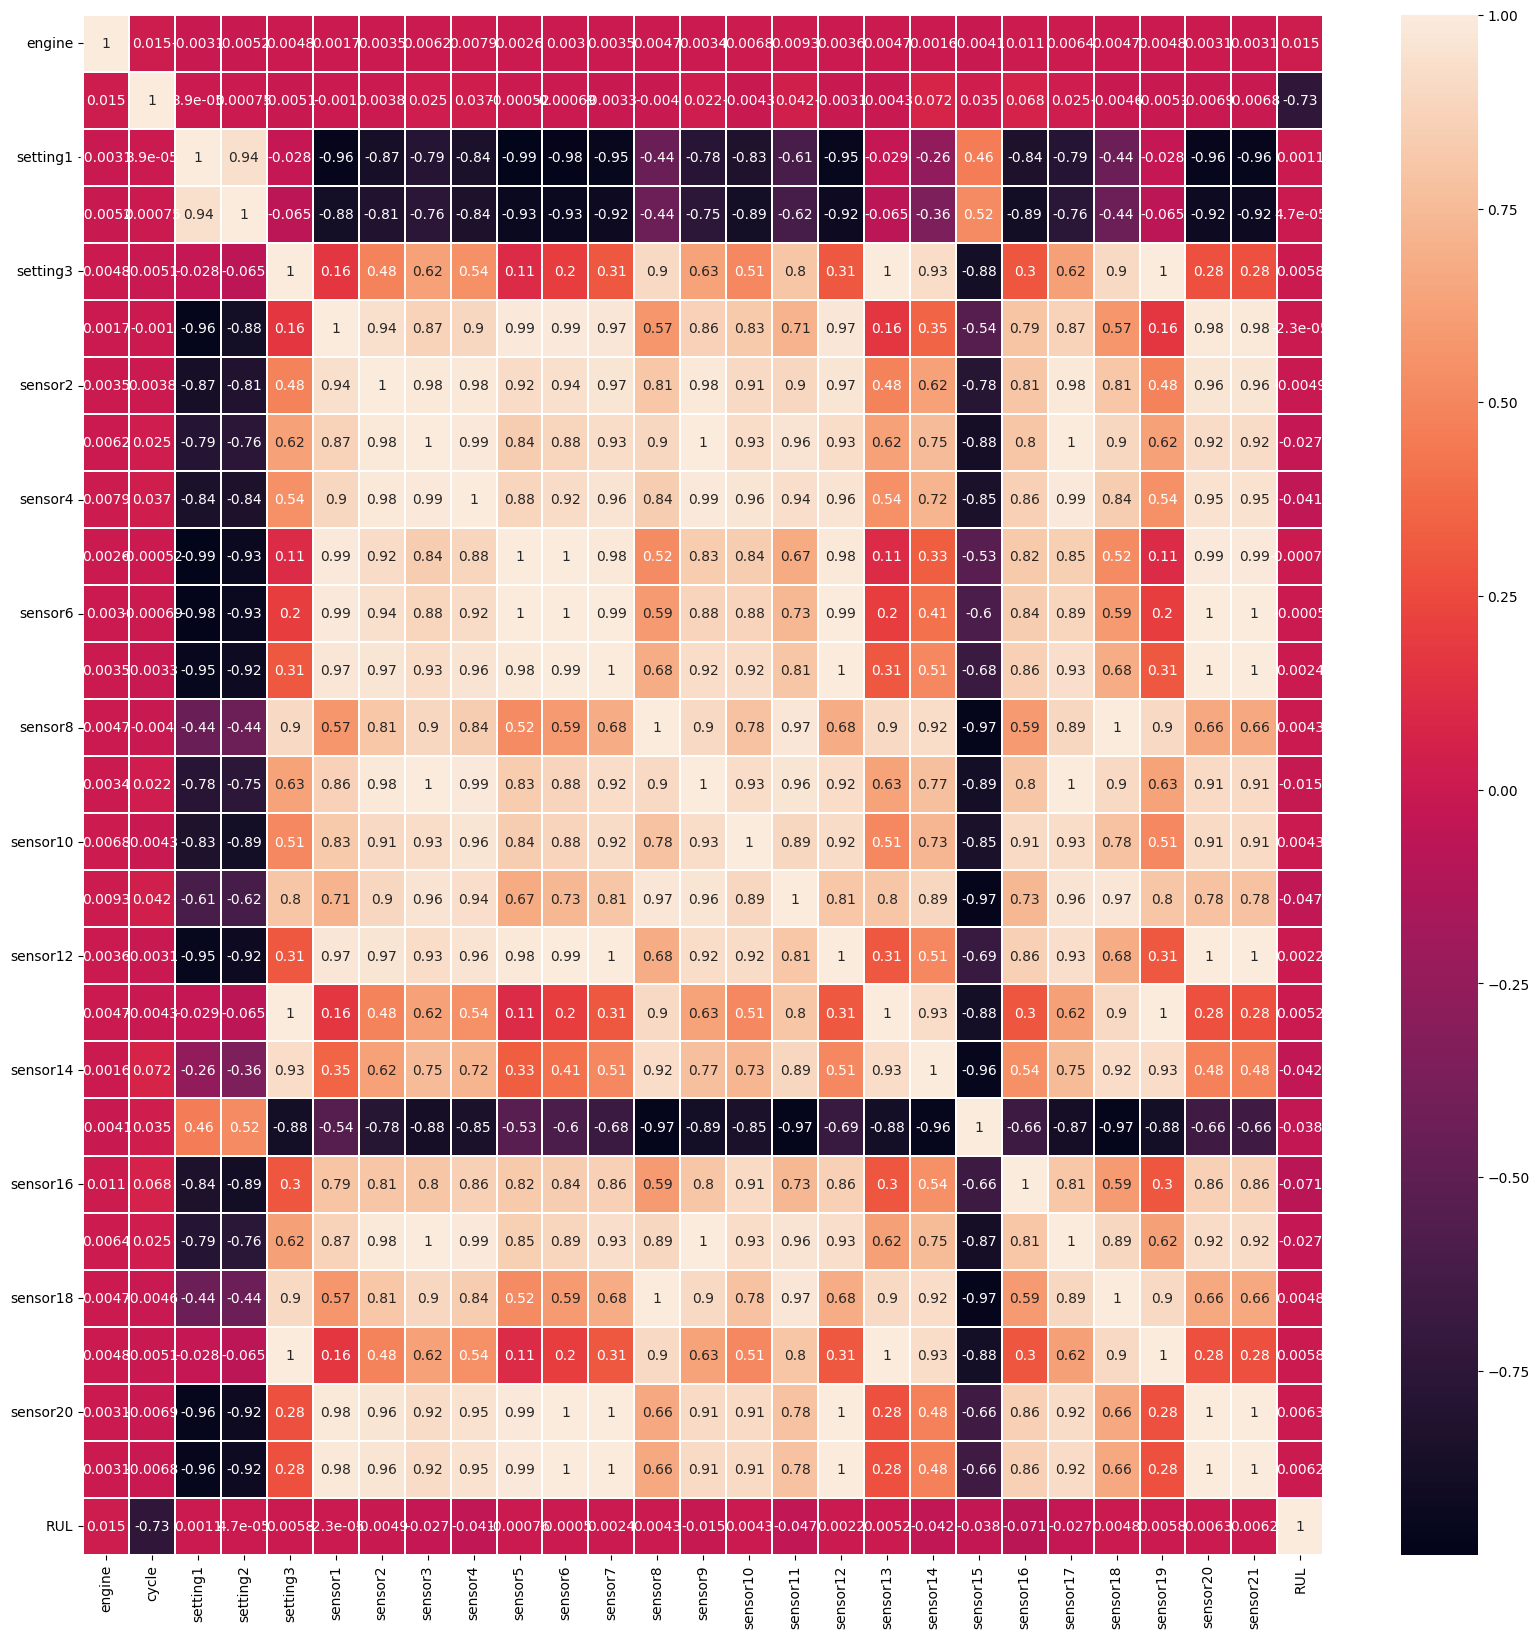

In [43]:
sns.heatmap(train_1.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

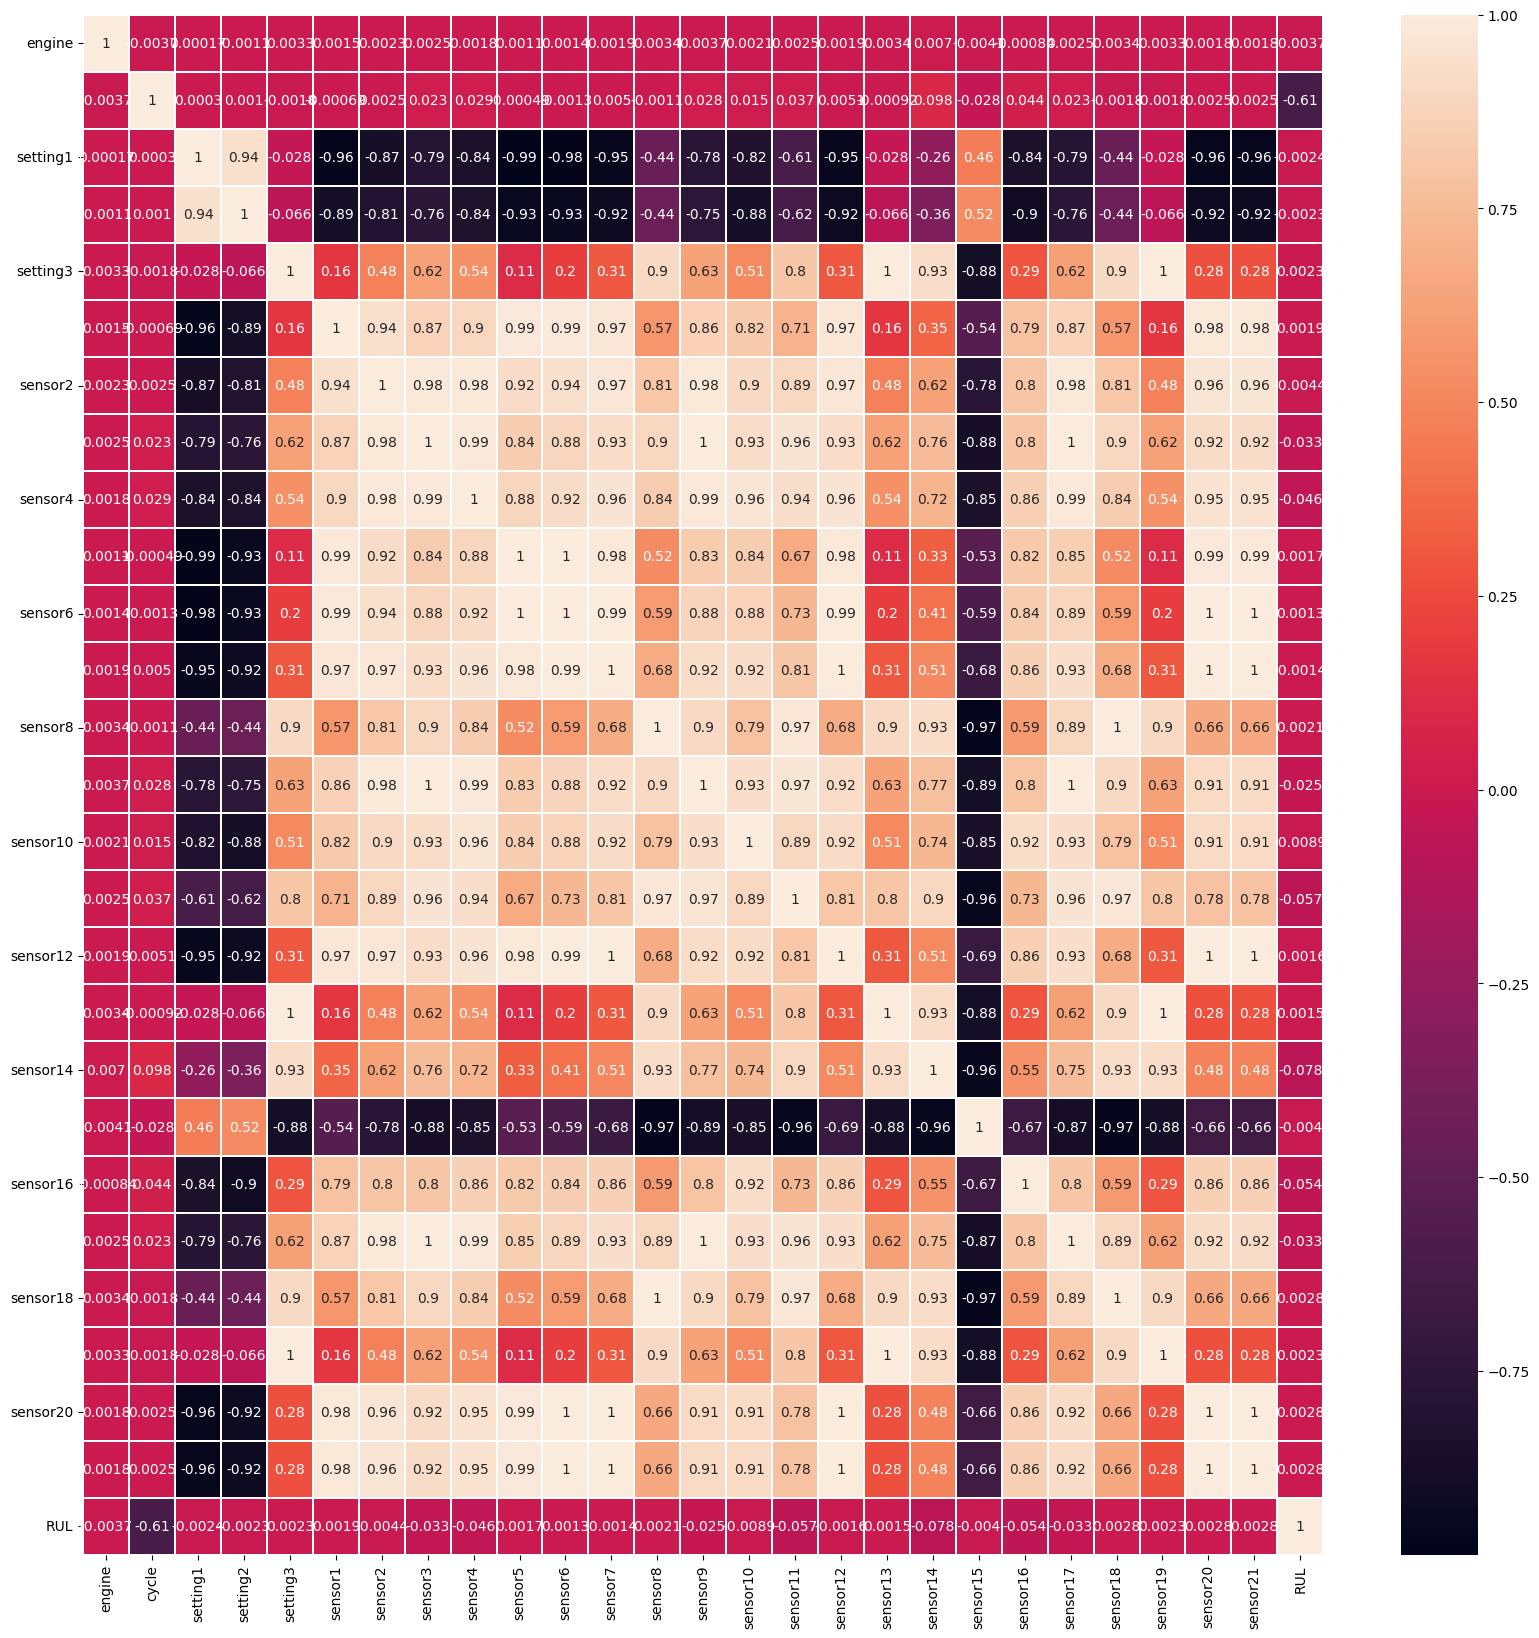

In [44]:
sns.heatmap(train_2.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
X1=train_1.drop(["engine","cycle","RUL"],axis=1)
y1=train_1["RUL"]

X1_train,X1_valid,y1_train,y1_valid=train_test_split(X1,y1,test_size=0.2,random_state=29)

In [50]:
X2=train_2.drop(["engine","cycle","RUL"],axis=1)
y2=train_2["RUL"]

X2_train,X2_valid,y2_train,y2_valid=train_test_split(X2,y2,test_size=0.2,random_state=29)

In [53]:
rul_1=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt",header=None, names=["RUL"])
rul_2=pd.read_csv("/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt",header=None, names=["RUL"])

In [56]:
test_1=pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt',sep="\s+",header=None)
test_2=pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt',sep="\s+",header=None)

In [57]:
test_1.columns=column_names
test_2.columns=column_names